In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Especifica la ruta a tu carpeta en Google Drive
drive_folder = '/content/drive/MyDrive/Research_CAWT/'

# Listar todos los archivos en la carpeta
all_files = os.listdir(drive_folder)
# print(all_files)

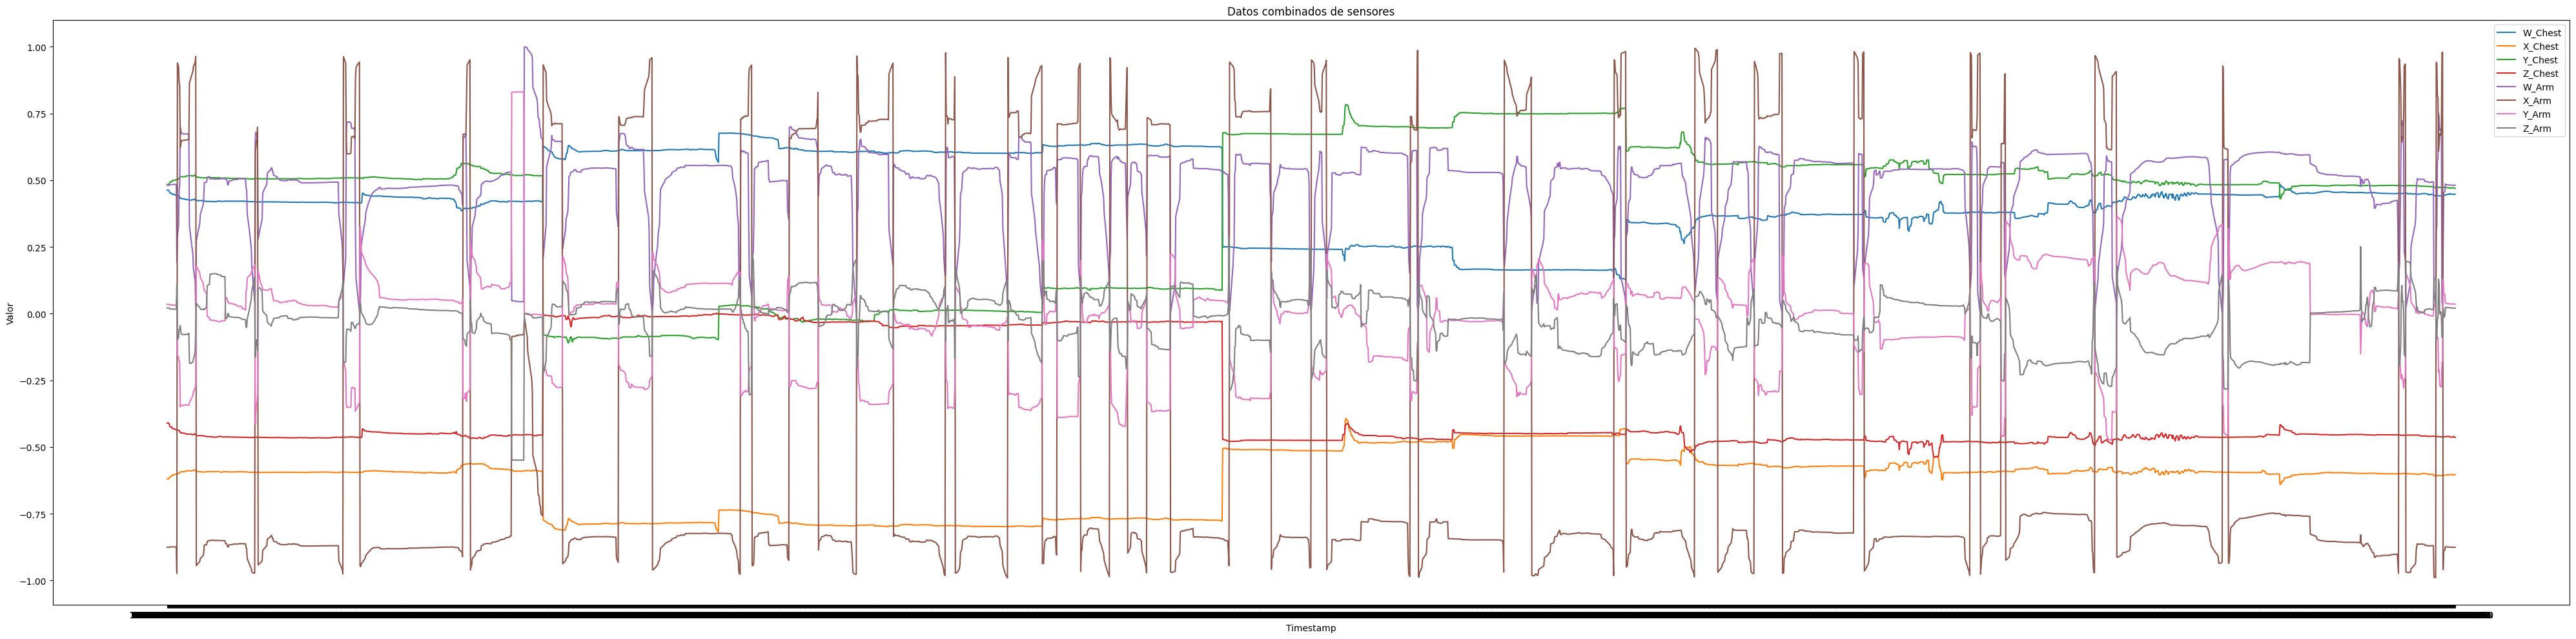

In [ ]:
# Especifica la ruta a tu carpeta en Google Drive
drive_folder = '/content/drive/MyDrive/Research_CAWT/'

# Listar todos los archivos en la carpeta
all_files = os.listdir(drive_folder)

# Filtrar archivos Excel
chest_files = [os.path.join(drive_folder, f) for f in all_files if 'sensor_data_chest' in f and f.endswith('.xlsx')]
arm_files = [os.path.join(drive_folder, f) for f in all_files if 'sensor_data_left_arm' in f and f.endswith('.xlsx')]

# Función para cargar los datos desde archivos Excel
def load_data(file_paths):
    data = []
    for file_path in file_paths:
        df = pd.read_excel(file_path)
        data.append(df)
    return pd.concat(data)

# Cargar los datos del sensor de pecho
chest_data = load_data(chest_files)

# Cargar los datos del sensor de brazo izquierdo
arm_data = load_data(arm_files)

# Asegurarse de que ambos DataFrames tengan las mismas columnas
chest_data.columns = ['timestamp', 'w_chest', 'x_chest', 'y_chest', 'z_chest']
arm_data.columns = ['timestamp', 'w_arm', 'x_arm', 'y_arm', 'z_arm']

# Alinear los datos por timestamp
aligned_data = pd.merge(chest_data, arm_data, on='timestamp', how='inner')

aligned_data_file = '/content/drive/MyDrive/Research_CAWT/aligned_sensor_data.xlsx'
aligned_data.to_excel(aligned_data_file, index=False)

# Graficar los datos combinados
plt.figure(figsize=(40, 10))

# Graficar datos del sensor del pecho
plt.plot(aligned_data['timestamp'], aligned_data['w_chest'], label='W_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['x_chest'], label='X_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['y_chest'], label='Y_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['z_chest'], label='Z_Chest')

# Graficar datos del sensor del brazo izquierdo
plt.plot(aligned_data['timestamp'], aligned_data['w_arm'], label='W_Arm')
plt.plot(aligned_data['timestamp'], aligned_data['x_arm'], label='X_Arm')
plt.plot(aligned_data['timestamp'], aligned_data['y_arm'], label='Y_Arm')
plt.plot(aligned_data['timestamp'], aligned_data['z_arm'], label='Z_Arm')

plt.title('Datos combinados de sensores')
plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()

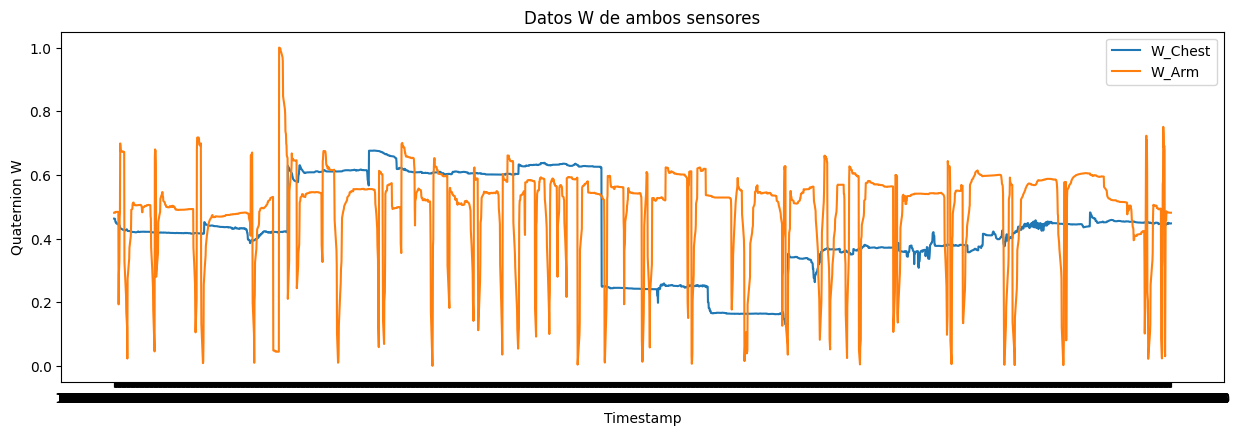

In [ ]:
# Graficar los datos combinados
plt.figure(figsize=(15, 10))

# Graficar datos del sensor del brazo
plt.subplot(2, 1, 2)
plt.plot(aligned_data['timestamp'], aligned_data['w_chest'], label='W_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['w_arm'], label='W_Arm')
plt.title('Datos W de ambos sensores')
plt.xlabel('Timestamp')
plt.ylabel('Quaternion W')
plt.legend()
plt.show()

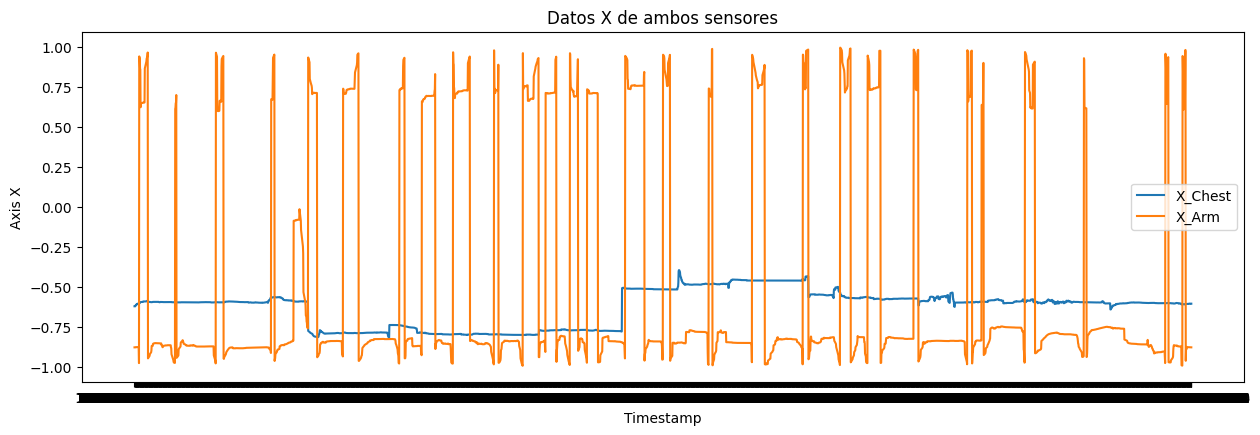

In [ ]:
# Graficar los datos combinados
plt.figure(figsize=(15, 10))

# Graficar datos del sensor del brazo
plt.subplot(2, 1, 2)
plt.plot(aligned_data['timestamp'], aligned_data['x_chest'], label='X_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['x_arm'], label='X_Arm')
plt.title('Datos X de ambos sensores')
plt.xlabel('Timestamp')
plt.ylabel('Axis X')
plt.legend()
plt.show()

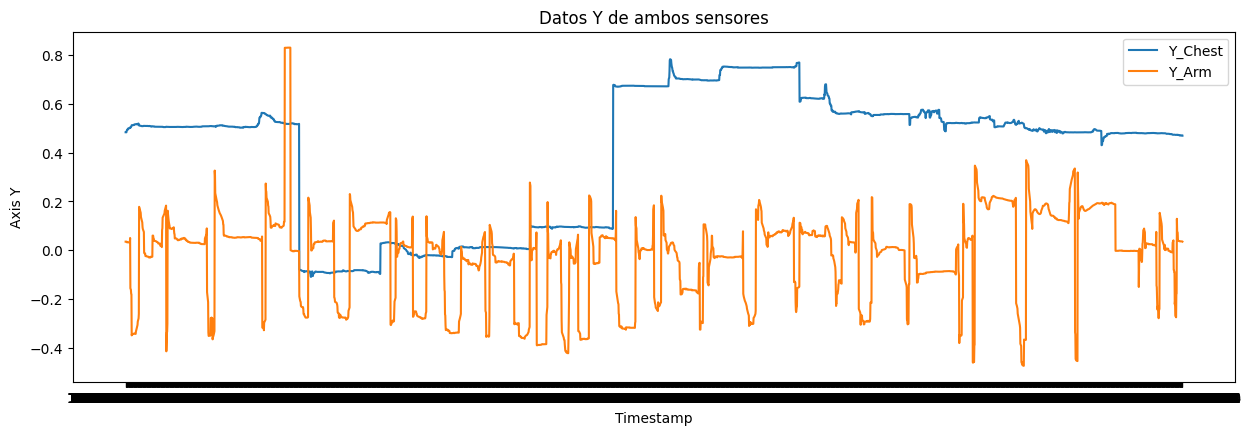

In [ ]:
# Graficar los datos combinados
plt.figure(figsize=(15, 10))

# Graficar datos del sensor del brazo
plt.subplot(2, 1, 2)
plt.plot(aligned_data['timestamp'], aligned_data['y_chest'], label='Y_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['y_arm'], label='Y_Arm')
plt.title('Datos Y de ambos sensores')
plt.xlabel('Timestamp')
plt.ylabel('Axis Y')
plt.legend()
plt.show()

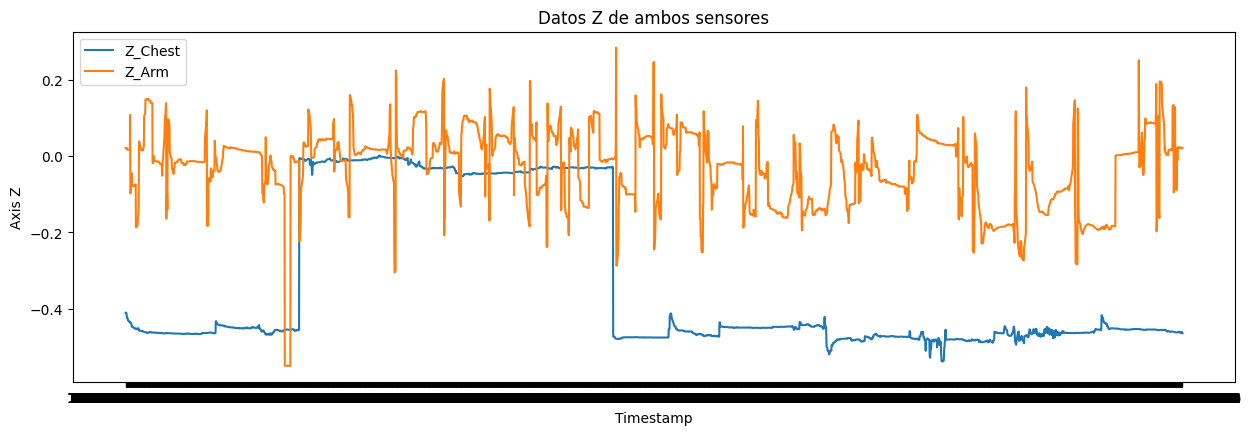

In [ ]:
# Graficar los datos combinados
plt.figure(figsize=(15, 10))

# Graficar datos del sensor del brazo
plt.subplot(2, 1, 2)
plt.plot(aligned_data['timestamp'], aligned_data['z_chest'], label='Z_Chest')
plt.plot(aligned_data['timestamp'], aligned_data['z_arm'], label='Z_Arm')
plt.title('Datos Z de ambos sensores')
plt.xlabel('Timestamp')
plt.ylabel('Axis Z')
plt.legend()
plt.show()

In [ ]:
# ETIQUETADO DE LOS DATOS (SEGMENTOS DE TIEMPO)

# Intervalos donde el brazo está arriba
up_intervals = [('17:37:11', '17:37:14'), ('17:40:59','17:41:00'),
                ('17:41:18', '17:41:21'), ('17:41:39','17:41:40'),
                ('16:43:59', '16:44:03'), ('16:44:13','16:44:19'),
                ('16:44:34', '16:44:36'), ('16:58:34','16:58:39'),
                ('16:58:46', '16:58:52'), ('16:59:02','16:59:04'),
                ('16:59:13', '17:01:30'), ('17:01:33','17:01:37'),
                ('17:01:42', '17:01:50'), ('17:01:54','17:01:59'),
                ('17:11:13', '17:11:21'), ('17:11:28','17:11:31'),
                ('17:11:44', '17:11:47'), ('17:15:34','17:15:39'),
                ('17:15:54', '17:15:56'), ('17:16:08','17:16:12'),
                ('17:23:38', '17:23:43'), ('17:23:55','17:23:57'),
                ('17:24:17', '17:24:19'), ('17:24:23','17:27:00'),
                ('17:27:15', '17:27:30'), ('17:27:40','17:27:42'),
                ('17:36:39', '17:36:41'), ('17:36:54','17:36:57')]

# Intervalos donde el brazo está abajo
down_intervals = [('17:37:01', '17:37:10'), ('17:37:15','17:40:58'),
                  ('17:41:01', '17:41:17'), ('17:41:22','17:41:38'),
                  ('17:41:41', '16:43:58'), ('16:44:04','16:44:12'),
                  ('16:44:20', '16:44:33'), ('16:44:37','16:58:33'),
                  ('16:58:40', '16:58:45'), ('16:58:53','16:59:01'),
                  ('16:59:05', '16:59:12'), ('17:01:31','17:01:32'),
                  ('17:01:38', '17:01:41'), ('17:01:51','17:01:53'),
                  ('17:02:00', '17:11:12'), ('17:11:22','17:11:27'),
                  ('17:11:32', '17:11:43'), ('17:11:48','17:15:33'),
                  ('17:15:40', '17:15:53'), ('17:15:57','17:16:07'),
                  ('17:16:13', '17:23:37'), ('17:23:44','17:23:54'),
                  ('17:23:58', '17:24:16'), ('17:24:20','17:24:22'),
                  ('17:27:01', '17:27:14'), ('17:27:31','17:27:39'),
                  ('17:27:43', '17:36:38'), ('17:36:42','17:36:53'),
                  ('17:36:58', '17:37:01')]

# Crear una columna para las etiquetas
aligned_data['label'] = 'unknown'

# Asignar etiquetas basadas en los intervalos de tiempo
for start, end in up_intervals:
    aligned_data.loc[(aligned_data['timestamp'] >= start) & (aligned_data['timestamp'] <= end), 'label'] = 'arriba'

for start, end in down_intervals:
    aligned_data.loc[(aligned_data['timestamp'] >= start) & (aligned_data['timestamp'] <= end), 'label'] = 'abajo'

# print(aligned_data)
# timestamp_to_filter = '17:01:42.380679'
# filtered_row = aligned_data[aligned_data['timestamp'] == timestamp_to_filter]
# print(filtered_row)

aligned_data = aligned_data[aligned_data['label'] != 'unknown']

# Verificar etiquetas únicas después de limpieza
print("Etiquetas únicas después de limpieza:", aligned_data['label'].unique())

# Verificar si hay valores faltantes después de la limpieza
print("Valores faltantes en aligned_data después de la limpieza:\n", aligned_data.isnull().sum())

Etiquetas únicas después de limpieza: ['abajo' 'arriba']
Valores faltantes en aligned_data después de la limpieza:
 timestamp    0
w_chest      0
x_chest      0
y_chest      0
z_chest      0
w_arm        0
x_arm        0
y_arm        0
z_arm        0
label        0
dtype: int64


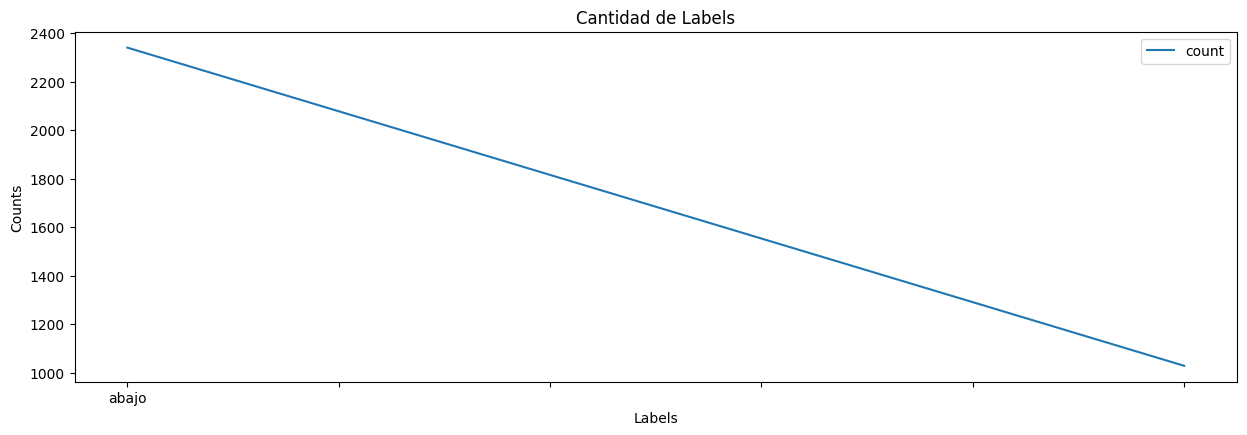

label
abajo     2341
arriba    1029
Name: count, dtype: int64


In [ ]:
# GRAFICAR LA CANTIDAD DE LABELS QUE HAY POR CADA UNO

labels_counts = aligned_data['label'].value_counts()

# Graficamos
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)
labels_counts.plot()
plt.title('Cantidad de Labels')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.legend()
plt.show()

print(labels_counts)

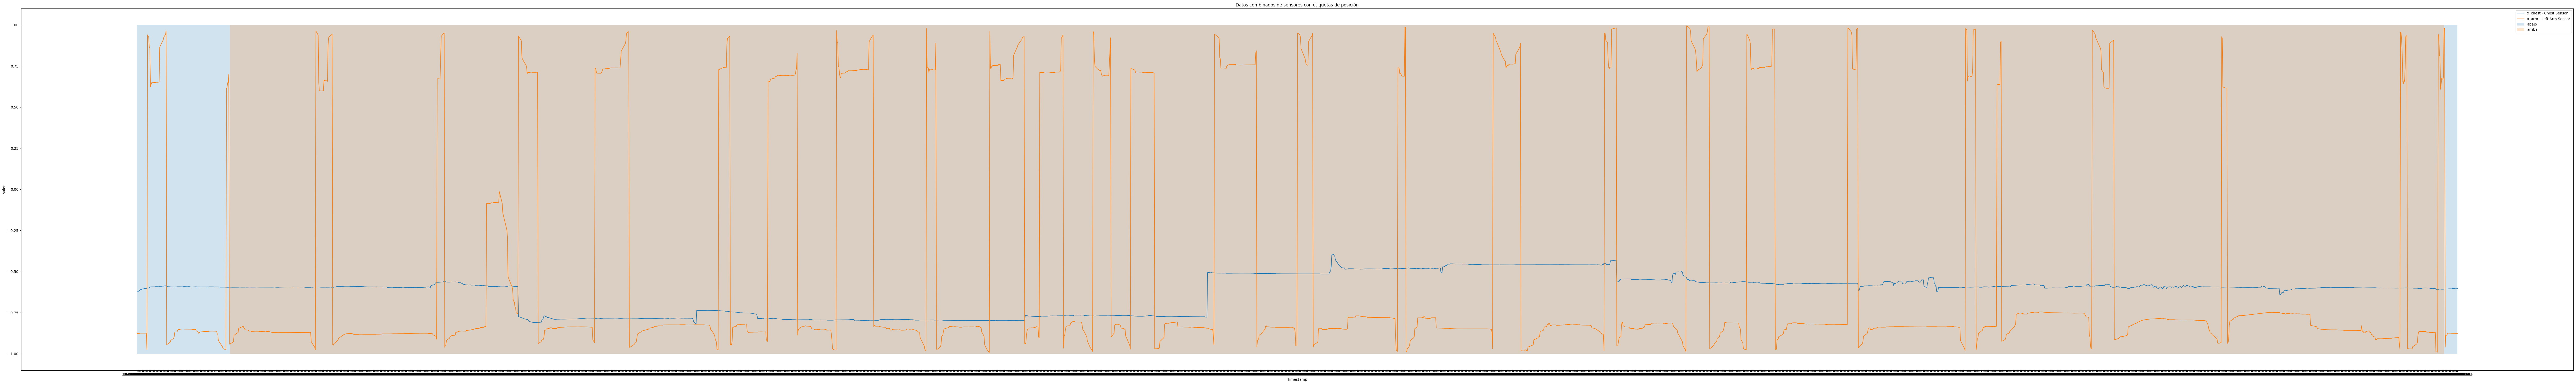

In [ ]:
# Graficar los datos combinados con etiquetas
plt.figure(figsize=(100, 15))

# Graficar datos del sensor del pecho
# plt.plot(aligned_data['timestamp'], aligned_data['w_chest'], label='w_chest - Chest Sensor')
plt.plot(aligned_data['timestamp'], aligned_data['x_chest'], label='x_chest - Chest Sensor')
# plt.plot(aligned_data['timestamp'], aligned_data['y_chest'], label='y_chest - Chest Sensor')
# plt.plot(aligned_data['timestamp'], aligned_data['z_chest'], label='z_chest - Chest Sensor')

# Graficar datos del sensor del brazo izquierdo
# plt.plot(aligned_data['timestamp'], aligned_data['w_arm'], label='w_arm - Left Arm Sensor')
plt.plot(aligned_data['timestamp'], aligned_data['x_arm'], label='x_arm - Left Arm Sensor')
# plt.plot(aligned_data['timestamp'], aligned_data['y_arm'], label='y_arm - Left Arm Sensor')
# plt.plot(aligned_data['timestamp'], aligned_data['z_arm'], label='z_arm - Left Arm Sensor')

# Agregar etiquetas de posición a la gráfica
for label in aligned_data['label'].unique():
    if label != 'unknown':
        mask = aligned_data['label'] == label
        plt.fill_between(aligned_data['timestamp'][mask], -1, 1, alpha=0.2, label=label)

plt.title('Datos combinados de sensores con etiquetas de posición')
plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Preparacion de los datos

from torch.utils.data import DataLoader, TensorDataset, random_split

# Seleccionar dispositivo (GPU si está disponible, de lo contrario CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convertir las etiquetas a valores numéricos
label_mapping = {'arriba': 1, 'abajo': 0}
aligned_data['label'] = aligned_data['label'].map(label_mapping)

# Seleccionar las características y etiquetas
features = aligned_data[['w_chest', 'x_chest', 'y_chest', 'z_chest', 'w_arm', 'x_arm', 'y_arm', 'z_arm']].values
labels = aligned_data['label'].values

# Convertir a tensores de PyTorch
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)

# Crear un dataset de PyTorch
dataset = TensorDataset(features_tensor, labels_tensor)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Crear dataloaders
batch_size = 32 # Numero de muestras que se procesarán juntas en una sola pasada por el modelo, cada lote contiene 32 muestras
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # Itera sobre los datos en mini-batches lo cual resulta util en el entrenamiento
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # Itera sobre los datos en mini-batches para el conjunto de datos de prueba



In [ ]:
# Definicion del modelo LSTM

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_dim = features.shape[1]
hidden_dim = 128
layer_dim = 2
output_dim = 2

model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim).to(device)



8


In [ ]:
# Función para ajustar el tamaño del lote
def collate_fn(batch):
    features, labels = zip(*batch)
    features = torch.stack(features).unsqueeze(1)  # Añadir dimensión de secuencia
    labels = torch.tensor(labels)
    return features, labels

# Crear dataloaders con la función de ajuste de tamaño de lote
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


In [ ]:
# Entrenamiento del modelo LSTM
import torch.optim as optim

# Configurar el criterio de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Función de entrenamiento
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Función de evaluación
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    return all_labels, all_predictions

# Entrenar el modelo
num_epochs = 50
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Evaluar el modelo y obtener las predicciones
true_labels, predictions = evaluate_model(model, test_loader)


Epoch [1/50], Loss: 0.1706
Epoch [2/50], Loss: 0.1693
Epoch [3/50], Loss: 0.1652
Epoch [4/50], Loss: 0.1673
Epoch [5/50], Loss: 0.1642
Epoch [6/50], Loss: 0.1629
Epoch [7/50], Loss: 0.1663
Epoch [8/50], Loss: 0.1650
Epoch [9/50], Loss: 0.1647
Epoch [10/50], Loss: 0.1628
Epoch [11/50], Loss: 0.1630
Epoch [12/50], Loss: 0.1645
Epoch [13/50], Loss: 0.1642
Epoch [14/50], Loss: 0.1622
Epoch [15/50], Loss: 0.1622
Epoch [16/50], Loss: 0.1595
Epoch [17/50], Loss: 0.1605
Epoch [18/50], Loss: 0.1588
Epoch [19/50], Loss: 0.1576
Epoch [20/50], Loss: 0.1574
Epoch [21/50], Loss: 0.1578
Epoch [22/50], Loss: 0.1540
Epoch [23/50], Loss: 0.1520
Epoch [24/50], Loss: 0.1525
Epoch [25/50], Loss: 0.1495
Epoch [26/50], Loss: 0.1467
Epoch [27/50], Loss: 0.1474
Epoch [28/50], Loss: 0.1462
Epoch [29/50], Loss: 0.1471
Epoch [30/50], Loss: 0.1447
Epoch [31/50], Loss: 0.1453
Epoch [32/50], Loss: 0.1432
Epoch [33/50], Loss: 0.1398
Epoch [34/50], Loss: 0.1401
Epoch [35/50], Loss: 0.1388
Epoch [36/50], Loss: 0.1423
E

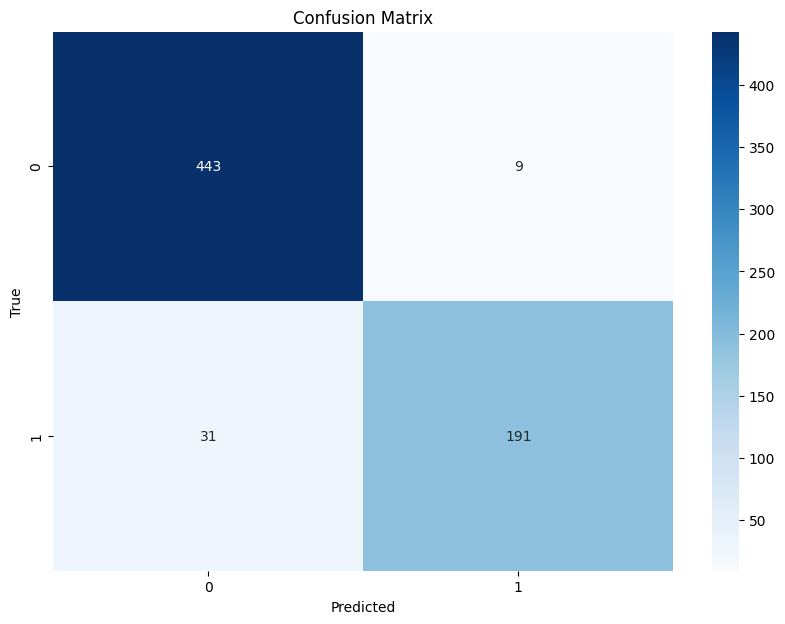

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       452
           1       0.95      0.86      0.91       222

    accuracy                           0.94       674
   macro avg       0.94      0.92      0.93       674
weighted avg       0.94      0.94      0.94       674



In [ ]:
# Analizar las predicciones

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Imprimir el informe de clasificación
print(classification_report(true_labels, predictions))


In [ ]:
# Prediccion individual

# Tomar una muestra aleatoria del conjunto de prueba
sample_index = np.random.choice(len(test_dataset))
sample, true_label = test_dataset[sample_index]

# Imprimir la muestra original
print("Muestra tomada (sin modificar):")
print(sample)

# Añadir dimensiones batch y secuencia
sample = sample.unsqueeze(0).unsqueeze(0).to(device)  # Añadir dimensiones para batch y secuencia

# Hacer una predicción
model.eval()
with torch.no_grad():
    output = model(sample)
    _, predicted_label = torch.max(output.data, 1)

# Mostrar el resultado
print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label.item()}")

# Imprimir la muestra procesada
print("Muestra tomada (procesada para el modelo):")
print(sample)

Muestra tomada (sin modificar):
tensor([ 0.4130, -0.5828,  0.5269, -0.4606,  0.2217,  0.9061, -0.2718, -0.2364])
True Label: 1
Predicted Label: 1
Muestra tomada (procesada para el modelo):
tensor([[[ 0.4130, -0.5828,  0.5269, -0.4606,  0.2217,  0.9061, -0.2718,
          -0.2364]]])


In [ ]:
# Guardar el modelo entrenado
torch.save(model.state_dict(), '/content/drive/MyDrive/Research_CAWT/lstm_model.pth')

In [ ]:
# Cargar el modelo entrenado
model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim)
model.load_state_dict(torch.load('/content/drive/MyDrive/Research_CAWT/lstm_model.pth'))
model.to(device)
model.eval()